In [21]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [22]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()

In [23]:
# 훈련세트, 테스트세트 크기 확인
x_train.shape, x_test.shape

((8982,), (2246,))

In [24]:
np.unique(y_train, return_counts =True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18], dtype=int64))

- 로이터 뉴스 카테고리 분류 데이터
    - 총 11258개의 뉴스 기사 데이터
    - 46개의 카테고리 분류
    - 예)
        - 중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다 -> 날씨
        - 올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다 -> 주식

In [25]:
# 하나의 문장이 이렇게 되어있음
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [26]:
# 단어장 생성
word_index = reuters.get_word_index()

In [27]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [28]:
idx2word = {0 : "<PAD>", 1 : "<S>", 2 : "<UNK>"}

In [29]:
idx2word.update({value + 3 : key for key, value in word_index.items()})

In [30]:
" ".join(map(lambda x: idx2word[x], x_train[0]))

'<S> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [31]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000, test_split=0.2)

- test_split=0.2) : 기본값이라 써도 그만, 안 써도 그만임

In [32]:
# 훈련세트와 검증세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                 random_state = 12)

In [33]:
# 단어 수 맞추기
train_seq = pad_sequences(x_train, maxlen= 150, truncating="post")
val_seq = pad_sequences(x_val, maxlen = 150, truncating="post")
test_seq = pad_sequences(x_test, maxlen = 150, truncating="post")

In [34]:
# 원핫인코딩
y_oh_train = keras.utils.to_categorical(y_train)
y_oh_test = keras.utils.to_categorical(y_test)
y_oh_val = keras.utils.to_categorical(y_val)

### 모델 구성

In [36]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 100, input_shape = (150,)))
model.add(keras.layers.Dropout(0.5)) # 밥에 소금, 후추 뿌리는 개념
model.add(keras.layers.Conv1D(64, 5, activation= 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(46, activation = 'softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          100000    
                                                                 
 dropout_4 (Dropout)         (None, 150, 100)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 146, 64)           32064     
                                                                 
 batch_normalization_2 (Bat  (None, 146, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 128)              

In [39]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 5e-4) 
model.compile(loss='categorical_crossentropy', optimizer = rmsprop, metrics= ['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights= True)

In [40]:
history = model.fit(train_seq, y_oh_train, batch_size = 64, epochs = 100,
                   validation_data=(val_seq, y_oh_val),
                   callbacks= [early_stopping_cb])

Epoch 1/100
113/113 [==============================] - 6s 39ms/step - loss: 2.1240 - accuracy: 0.4817 - val_loss: 3.6172 - val_accuracy: 0.3728
Epoch 2/100
113/113 [==============================] - 4s 34ms/step - loss: 1.6277 - accuracy: 0.6088 - val_loss: 3.3492 - val_accuracy: 0.6055
Epoch 3/100
113/113 [==============================] - 4s 34ms/step - loss: 1.4159 - accuracy: 0.6693 - val_loss: 2.5993 - val_accuracy: 0.6767
Epoch 4/100
113/113 [==============================] - 4s 34ms/step - loss: 1.2548 - accuracy: 0.7088 - val_loss: 2.0561 - val_accuracy: 0.6984
Epoch 5/100
113/113 [==============================] - 4s 35ms/step - loss: 1.1593 - accuracy: 0.7301 - val_loss: 1.5023 - val_accuracy: 0.7234
Epoch 6/100
113/113 [==============================] - 4s 35ms/step - loss: 1.0918 - accuracy: 0.7484 - val_loss: 1.2021 - val_accuracy: 0.7390
Epoch 7/100
113/113 [==============================] - 4s 36ms/step - loss: 1.0179 - accuracy: 0.7640 - val_loss: 1.1391 - val_accuracy:

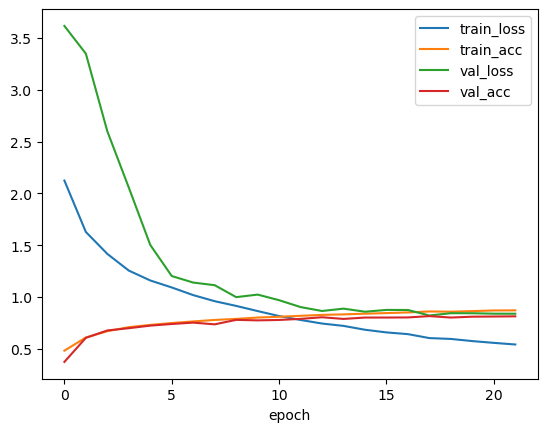

In [41]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

- train_loss 가 val_loss보다 낮아야함

In [42]:
model.evaluate(test_seq, y_oh_test)

71/71 [==============================] - 1s 8ms/step - loss: 0.9029 - accuracy: 0.7921


[0.9029039740562439, 0.7920747995376587]